
### Example 1. Iris

#### 1. Visualize 2D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

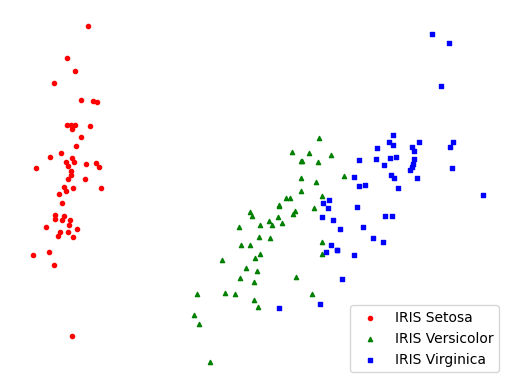

In [64]:
df = pd.read_csv("iris.csv")
Y = df['variety']
Y = Y.replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})
X = df.drop("variety", axis=1)

# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())

pca = PCA() #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

# visualize
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

#### 2. Classification using Logistic Regression and PCA

##### (a) with original dataset

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=17, stratify=Y)
print(X_train.shape)
print(X_train[Y_train==0].shape)

(120, 4)
(40, 4)


In [4]:
# call Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)
# and train model by training set
lorg.fit(X_train,Y_train)

# make prediction on test set
Y_pred = lorg.predict(X_test)
Y_pred

array([1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       1, 0, 0, 2, 2, 2, 0, 2], dtype=int64)

In [5]:
# for accuracy
print('Accuracy:', accuracy_score(Y_test,Y_pred))
# for confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


##### (b) with dataset after dimensionality reduction

(i) split into Train-Test -> PCA

In [6]:
# read data
df = pd.read_csv("iris.csv")
Y = df['variety']
Y = Y.replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})
X = df.drop("variety", axis=1)

In [7]:
# split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)
print(X_train.shape)
print(X_train[Y_train==0].shape)

(120, 4)
(39, 4)


In [8]:
# train the PCA model 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train))
X_train_pca

,0,1
0,1.272261,0.358003
1,0.151947,-0.299969
2,-2.189471,0.616852
3,0.941933,0.012192
4,1.762775,-0.270963
...,...,...
115,-2.234732,-0.382871
116,1.350651,-0.117678
117,0.062300,-0.812247
118,2.395611,2.450754


In [9]:
# train Logistic Regression model
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train_pca, Y_train)

# apply PCA model to the test data
X_test_pca = pca.transform(scaler.transform(X_test))

# predict
Y_pred = lorg.predict(X_test_pca)
Y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [10]:
# for accuracy
print('Accuracy:', accuracy_score(Y_test, Y_pred))
# for confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

Accuracy: 0.8666666666666667
[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]


(ii) PCA -> split into Train-Test

In [11]:
# read data
df = pd.read_csv("iris.csv")
Y = df['variety']
Y = Y.replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})
X = df.drop("variety", axis=1)

In [12]:
# train the PCA model on the whole dataset
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X))
X_pca

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [13]:
# split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=.2, random_state=17)
print(X_train.shape)
print(X_train[Y_train==0].shape)

(120, 2)
(43, 2)


In [14]:
# train Logistic Regression model
lorg = LogisticRegression(random_state=17)
lorg.fit(X_train, Y_train)

# predict
Y_pred = lorg.predict(X_test)
Y_pred

array([0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [15]:
# for accuracy
print('Accuracy:', accuracy_score(Y_test,Y_pred))
# for confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

Accuracy: 0.9
[[ 7  0  0]
 [ 0 11  0]
 [ 0  3  9]]


- So sánh kết quả trong 2 trường hợp (i) và (ii)
    + Giảm chiều trước khi chia train-test (ii) cho độ chính xác (accuracy_score) cao hơn sau khi chia (i), do mô hình có học được từ toàn bộ dữ liệu -> test data không còn là dữ liệu mới -> không đảm bảo tính khách quan
    + Quy trình phù hợp: nên chia train-test trước và áp dụng giảm chiều với training set, sau đó biến đổi test set và thực hiện dự đoán
- So sánh kết quả của dữ liệu nguyên bản với dữ liệu giảm chiều
    + Ở bài toán này, kết quả dự đoán trên dữ liệu nguyên bản có độ chính xác cao hơn (0.967) so với dữ liệu giảm chiều (0.9)
    + Tuy nhiên, với các bài toán có nhiều thuộc tính hơn, độ chính xác này có thể thấp hơn, khi đó PCA sẽ giúp hiểu rõ hơn về dữ liệu, giảm chiều giúp đơn giản hóa bài toán, tăng độ chính xác và tiết kiệm thời gian

### Example 2. Parkingson's Disease

#### 1. Visualize 2D

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read data from file
df = pd.read_csv("pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [19]:
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

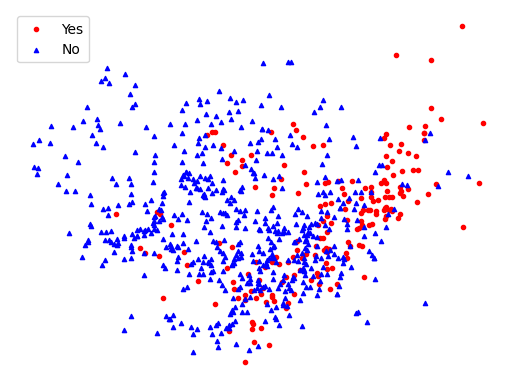

In [39]:
Y = df['class']
X = df.drop(['class', 'id'], axis=1)

# normalize data
X_norm = (X - X.min())/(X.max() - X.min())

pca = PCA() #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

# visualize
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='Yes',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='No',
c='blue', marker="^")
plt.legend()
plt.show()

#### 2. Dimensionality reduction and classification

In [50]:
# read data
df = pd.read_csv("pd_speech_features.csv")

# split data into training - test set
train = df.sample(500, random_state=17)
test = df[~df.index.isin(train.index)]

Y_train = train['class']
X_train = train.drop(['id', 'class'], axis=1)

Y_test = test['class']
X_test = test.drop(['id', 'class'], axis=1)

print('Training set')
print('Number of records:', X_train.shape[0])
print('Number of dimensions:', X_train.shape[1])

Training set
Number of records: 500
Number of dimensions: 753


In [52]:
# reduce dimension to 200
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=200)
X_train_200 = pd.DataFrame(pca.fit_transform(X_train_scaled))

In [53]:
# train Logistic Regression model
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train_200, Y_train)

# apply PCA model to the test data
X_test_200 = pca.transform(scaler.transform(X_test))

# predict
Y_pred = lorg.predict(X_test_200)
Y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [54]:
# for accuracy
print('Accuracy:', accuracy_score(Y_test, Y_pred))
# for confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

Accuracy: 0.83203125
[[ 37  21]
 [ 22 176]]


#### 3. PCA for choosing the suitable number of dimensions

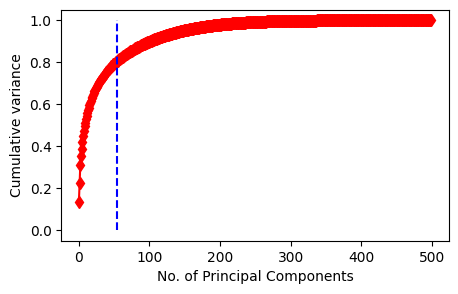

Minimal no. of dimensions for capturing 80% of information: 54


In [90]:
# pca to analyse
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA()
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

ax = plt.figure(figsize = (5, 3))
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot([i for i in range(X_train_pca.shape[1])], cumsum, '-rd')
plt.xlabel("No. of Principal Components")
plt.ylabel("Cumulative variance")

d = np.argmax(cumsum >= 0.8) + 1
plt.vlines(x=d, ymin=0, ymax=1, color='blue', linestyle='--')
plt.show()
print('Minimal no. of dimensions for capturing 80% of information:', d)


In [97]:
# pca for 54 dimensions
pca = PCA(n_components=54)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

# apply PCA model to the test data
X_test_pca = pca.transform(scaler.transform(X_test))

In [98]:
# classification
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train_pca, Y_train)

# predict
Y_pred = lorg.predict(X_test_pca)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [99]:
# for accuracy
print('Accuracy:', accuracy_score(Y_test, Y_pred))
# for confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Accuracy: 0.83984375
[[ 36  22]
 [ 19 179]]


#### 4. Comparison

4.1. Classification with original dataset

In [106]:
from sklearn.model_selection import train_test_split

# read data from file
df = pd.read_csv("pd_speech_features.csv")
df.head()

Y = df['class']
X = df.drop(['class', 'id'], axis=1)

# split data into training-test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=17)
print(X_train.shape)
print(X_test.shape)


(529, 753)
(227, 753)


In [111]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score

nb_clf = GaussianNB(priors=None)
nb_clf.fit(X_train, Y_train)
Y_pred_nb = nb_clf.predict(X_test)

# evalutaion
print('Accuracy:', accuracy_score(Y_test, Y_pred_nb))
print('Precision:', precision_score(Y_test, Y_pred_nb))
print('Recall:', recall_score(Y_test, Y_pred_nb))
cm = confusion_matrix(Y_test, Y_pred_nb)
print(cm)

Accuracy: 0.748898678414097
Precision: 0.8054054054054054
Recall: 0.8764705882352941
[[ 21  36]
 [ 21 149]]


In [113]:
# Logistic Regression
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train, Y_train)
Y_pred_lr = lorg.predict(X_test)

# evaluation
print('Accuracy:', accuracy_score(Y_test, Y_pred_lr))
print('Precision:', precision_score(Y_test, Y_pred_lr))
print('Recall:', recall_score(Y_test, Y_pred_lr))
cm = confusion_matrix(Y_test, Y_pred_lr)
print(cm)

Accuracy: 0.7400881057268722
Precision: 0.7655502392344498
Recall: 0.9411764705882353
[[  8  49]
 [ 10 160]]


4.2. Classification with dimensionality reduction

In [116]:
# PCA using the number of dimensions chosen above (d=54)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=54)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

# apply PCA model for test set
X_test_pca = pca.transform(scaler.transform(X_test))

In [118]:
# Naive Bayes
nb_clf = GaussianNB(priors=None)
nb_clf.fit(X_train_pca, Y_train)
Y_pred_nb = nb_clf.predict(X_test_pca)

# evalutaion
print('Accuracy:', accuracy_score(Y_test, Y_pred_nb))
print('Precision:', precision_score(Y_test, Y_pred_nb))
print('Recall:', recall_score(Y_test, Y_pred_nb))
cm = confusion_matrix(Y_test, Y_pred_nb)
print(cm)


Accuracy: 0.775330396475771
Precision: 0.7989949748743719
Recall: 0.9352941176470588
[[ 17  40]
 [ 11 159]]


In [120]:
# Logistic Regression
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train_pca, Y_train)
Y_pred_lr = lorg.predict(X_test_pca)

# evaluation
print('Accuracy:', accuracy_score(Y_test, Y_pred_lr))
print('Precision:', precision_score(Y_test, Y_pred_lr))
print('Recall:', recall_score(Y_test, Y_pred_lr))
cm = confusion_matrix(Y_test, Y_pred_lr)
print(cm)

Accuracy: 0.7973568281938326
Precision: 0.8647058823529412
Recall: 0.8647058823529412
[[ 34  23]
 [ 23 147]]


-> mô hình sau khi phân tích thành phân chính và giảm chiều có độ chính xác cao hơn so với mô hình sử dụng tập dữ liệu ban đầu

### Example 3. Handwritten Digits Recognition

#### 1. Dimensionality reduction (d=100)

In [127]:
# read data from file
import os

# define paths
data_path = 'D:/python/pyforml/week04_multinomial-regression/homework'
img_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

In [128]:
# extract and read data from file
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    import gzip # to decompress gz (zip) file

    # read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # convert into images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [129]:
# call read input method
images, labels = get_mnist_data(
    img_path, labels_path, 5000, shuffle=True)

print(images.shape, labels.shape)

(5000, 784) (5000,)


In [130]:
# PCA for dimensionality reduction
scaled_images = StandardScaler().fit_transform(images)
pca = PCA(n_components=100)
transformed = pd.DataFrame(pca.fit_transform(scaled_images))
transformed.shape

(5000, 100)

#### 2. Multinomial Logistic Regression

(a) with original dataset

In [132]:
# split data into train-test set
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=17, stratify=labels)

print(train_images.shape)
print(test_images.shape)

(3500, 784)
(1500, 784)


In [137]:
import time
# fit model
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=100)
start = time.time()
lorg.fit(train_images, train_labels)
end = time.time()
lr_execution = end - start
print('Execution time: %.2fms' % lr_execution)

# predict
Y_pred = lorg.predict(test_images)

Execution time: 13.10ms


In [134]:
# evaluation
accu = accuracy_score(test_labels, Y_pred)
print('Accuracy:', accu)

cm = confusion_matrix(test_labels, Y_pred)
print(cm)

Accuracy: 0.872
[[136   0   1   0   0   4   1   0   4   0]
 [  0 162   0   0   1   0   2   0   1   0]
 [  0   4 136   5   1   0   2   2   7   0]
 [  0   1   4 134   1   7   3   1   5   0]
 [  0   0   1   2 124   0   0   1   3  11]
 [  1   1   2   5   0 101   6   3   7   4]
 [  0   0   5   0   2   5 127   2   1   0]
 [  2   2   1   1   1   0   0 148   3   8]
 [  0   8   1   5   5  11   1   2 111   3]
 [  1   0   0   2   4   2   0   7   3 129]]


(b) with 100-dimensional dataset

In [139]:
# split data into train-test set
train_images, test_images, train_labels, test_labels = train_test_split(transformed, labels, test_size=0.3, random_state=17, stratify=labels)

print(train_images.shape)
print(test_images.shape)

(3500, 100)
(1500, 100)


In [140]:
# fit model
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=100)
start = time.time()
lorg.fit(train_images, train_labels)
end = time.time()
lr_pca_execution = end - start
print('Execution time: %.2fms' % lr_pca_execution)

# predict
Y_pred = lorg.predict(test_images)

Execution time: 1.93ms


In [141]:
# evaluation
accu = accuracy_score(test_labels, Y_pred)
print('Accuracy:', accu)

cm = confusion_matrix(test_labels, Y_pred)
print(cm)

Accuracy: 0.8793333333333333
[[138   0   1   0   0   4   3   0   0   0]
 [  0 158   0   0   1   0   2   0   5   0]
 [  0   4 138   4   3   0   1   3   4   0]
 [  0   0   2 137   3   7   2   1   3   1]
 [  0   0   1   1 124   0   1   3   1  11]
 [  3   1   1   7   0 106   5   2   4   1]
 [  0   0   5   0   3   1 130   1   2   0]
 [  1   3   3   0   1   0   0 148   1   9]
 [  0   9   1   5   2   8   3   0 115   4]
 [  1   0   1   3   7   2   0   7   2 125]]


-> so sánh: mô hình phân loại với dữ liệu đã qua giảm chiều cho kết quả chính xác và thời gian chạy nhanh hơn so với mô hình sử dụng tập dữ liệu ban đầu